---

## Universidad de Costa Rica
### Escuela de Ingeniería Eléctrica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Segundo semestre del 2020

---

* Estudiante: **Moisés Mora Ceciliano**
* Carné: **B75036**
* Grupo: **1**

---
# `P4` - *Modulación digital IQ*

> La modulación digital es una de las aplicaciones directas del análisis de procesos estocásticos, presente en los sistemas digitales de comunicación. Este proyecto presenta una introdución a tópicos fundamentales de la ingeniería de comunicaciones para simular un sistema de transmisión de imágenes de baja resolución.

---
* Elaboración de nota teórica y demostración: **Jeaustin Sirias Chacón**, como parte de IE0499 - Proyecto Eléctrico: *Estudio y simulación de aplicaciones de la teoría de probabilidad en la ingeniería eléctrica*.
* Revisión: **Fabián Abarca Calderón**

## 3.3. - Modulación IQ y QPSK

Obsérvese que en la modulación BPSK anterior existe una única portadora (*carrier*) sinusoidal, dada por

$$
c(t) = A_c \sin(2\pi f_c t - \theta_c)
$$

La propiedad de la **ortogonalidad** entre las funciones $\sin(\omega t)$ y $\cos(\omega t)$ permite utilizar dos portadoras en lugar de una, de forma tal que es posible crear una señal modulada del tipo:

$$
s(t) = A_1 \cos(2\pi f_c t) + A_2 \sin(2\pi f_c t)
$$

Esta señal ocupa el mismo ancho de banda que una sola portadora sinusoidal, pero puede transportar el doble de la información, codificada en $A_1$ y $A_2$. Debido a que las ondas seno y coseno están separadas por un desfase de 90 grados, a este tipo de modulación se le llama "en fase" (I, *in phase*) y "en cuadratura" (Q, *quadrature*), o **modulación IQ**.

### 3.3.1. - Ortogonalidad

La prueba de ortogonalidad de dos funciones del tiempo está dada por el producto interno:

$$
\begin{aligned}
(f * g) (t) & = \langle f(t), g(t)\rangle \\
& = \int f(t) g(t) ~ \mathrm{d}t            
\end{aligned}
$$

Y en el caso de las dos portadoras sinusoidales:

$$
\begin{aligned}
(f * g) (t) & = \langle f(t), g(t)\rangle \\
& = \int f(t) g(t) ~ \mathrm{d}t \\
& = \int \cos(2\pi f_c t) ~ \sin(2\pi f_c t) ~ \mathrm{d}t \\
& = 0 
\end{aligned}
$$

> Podría decirse, coloquialmente, que las portadoras viajan "juntas pero no revueltas". 

Este resultado es útil para la *demodulación coherente (en fase)* de señales IQ, porque permite "separar" una portadora de otra.

### 3.3.2. - Modulación QPSK

La modulación BPSK tiene dos símbolos posibles (`0`, `1`) lo que implica un bit $b$ por símbolo, mientras que la modulación QPSK (*Quadrature Phase-Shift Keying*) tiene cuatro símbolos posibles (`00`, `01`, `10`, `11`), con dos bits $b_1 b_2$ por símbolo. La codificación para un símbolo $b_1 b_2$ es ahora:

$$
s(t) = A_1 \cos(2\pi f_c t) + A_2 \sin(2\pi f_c t)
$$

con

$$
A_1 = 
\begin{cases}
             -1, &   \text{si } b_1 = 0 \\
             1, &  \text{si } b_1 = 1 \\
\end{cases}
$$

y

$$
A_2 = 
\begin{cases}
             -1, &   \text{si } b_2 = 0 \\
             1, &  \text{si } b_2 = 1 \\
\end{cases}
$$

Si se grafica la amplitud $A_1$ y $A_2$ de cada portadora en una gráfica donde el eje $x$ representa al coseno (en fase, $I$) y el eje $y$ al seno (en cuadratura, $Q$), se obtiene lo que se conoce como un "diagrama de constelación" de la modulación:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/QPSK_Gray_Coded.svg/800px-QPSK_Gray_Coded.svg.png' width='200'>

Ahí es posible verificar la correspondencia de los bits $b_1 b_2$ (`00`, `01`, `10`, `11`) con los puntos de la constelación.

> La modulación QPSK es utilizada en el estándar Wi-Fi IEEE 802.11 (una de sus posibles modulaciones), en comunicaciones satelitales, y en 5G, entre otros.

---
## 4. - Asignaciones del proyecto

### 4.1. - Modulación QPSK

* (50%) Realice una simulación del sistema de comunicaciones como en la sección 3.2., pero utilizando una modulación QPSK en lugar de una modulación BPSK. Deben mostrarse las imágenes enviadas y recuperadas y las formas de onda.

In [13]:
#################################################
from PIL import Image
import numpy as np

def fuente_info(imagen):
    '''Una función que simula una fuente de
    información al importar una imagen y 
    retornar un vector de NumPy con las 
    dimensiones de la imagen, incluidos los
    canales RGB: alto x largo x 3 canales

    :param imagen: Una imagen en formato JPG
    :return: un vector de pixeles
    '''
    img = Image.open(imagen)
    
    return np.array(img)

###################################################

def rgb_a_bit(imagen):
    '''Convierte los pixeles de base 
    decimal (de 0 a 255) a binaria 
    (de 00000000 a 11111111).

    :param imagen: array de una imagen 
    :return: Un vector de (1 x k) bits 'int'
    '''
    # Obtener las dimensiones de la imagen
    x, y, z = imagen.shape
    
    # Número total de pixeles
    n_pixeles = x * y * z

    # Convertir la imagen a un vector unidimensional de n_pixeles
    pixeles = np.reshape(imagen, n_pixeles)

    # Convertir los canales a base 2
    bits = [format(pixel,'08b') for pixel in pixeles]
    bits_Rx = np.array(list(''.join(bits)))
    
    return bits_Rx.astype(int)

##########################################################
def modulador_I(bits, fc, mpp):
    '''Un método que simula el esquema de 
    modulación digital BPSK.

    :param bits: Vector unidimensional de bits
    :param fc: Frecuencia de la portadora en Hz
    :param mpp: Cantidad de muestras por periodo de onda portadora
    :return: Un vector con la señal modulada
    :return: Un valor con la potencia promedio [W]
    :return: La onda portadora c(t)
    :return: La onda cuadrada moduladora (información)
    '''
    # 1. Parámetros de la 'señal' de información (bits)
    N = len(bits) # Cantidad de bits

    # 2. Construyendo un periodo de la señal portadora c(t)
    Tc = 1 / fc  # periodo [s]
    t_periodo = np.linspace(0, Tc, mpp)
    portadora_I = np.cos(2*np.pi*fc*t_periodo)

    # 3. Inicializar la señal modulada s(t)
    t_simulacion = np.linspace(0, N*Tc, N*mpp) 
    senal_Tx_I = np.zeros(t_simulacion.shape)
 
    # 4. Asignar las formas de onda según los bits (QPSK)
    for i, bit in enumerate(bits):
        if bit == 1:
            senal_Tx_I[i*mpp : (i+1)*mpp] = portadora_I
        else:
            senal_Tx_I[i*mpp : (i+1)*mpp] = portadora_I * -1
    
    # 5. Calcular la potencia promedio de la señal modulada
    Pm_I = (1 / (N*Tc)) * np.trapz(pow(senal_Tx_I, 2), t_simulacion)
    
    return senal_Tx_I, Pm_I, portadora_I

#################################################################
def modulador_Q(bits, fc, mpp):
    '''Un método que simula el esquema de 
    modulación digital BPSK.

    :param bits: Vector unidimensional de bits
    :param fc: Frecuencia de la portadora en Hz
    :param mpp: Cantidad de muestras por periodo de onda portadora
    :return: Un vector con la señal modulada
    :return: Un valor con la potencia promedio [W]
    :return: La onda portadora c(t)
    :return: La onda cuadrada moduladora (información)
    '''
    # 1. Parámetros de la 'señal' de información (bits)
    N = len(bits) # Cantidad de bits

    # 2. Construyendo un periodo de la señal portadora c(t)
    Tc = 1 / fc  # periodo [s]
    t_periodo = np.linspace(0, Tc, mpp)
    portadora_Q = np.sin(2*np.pi*fc*t_periodo)

    # 3. Inicializar la señal modulada s(t)
    t_simulacion = np.linspace(0, N*Tc, N*mpp) 
    senal_Tx_Q = np.zeros(t_simulacion.shape)
 
    # 4. Asignar las formas de onda según los bits (BPSK)
    for i, bit in enumerate(bits):
        if bit == 1:
            senal_Tx_Q[i*mpp : (i+1)*mpp] = portadora_Q
        else:
            senal_Tx_Q[i*mpp : (i+1)*mpp] = portadora_Q * -1
    
    # 5. Calcular la potencia promedio de la señal modulada
    Pm_Q = (1 / (N*Tc)) * np.trapz(pow(senal_Tx_Q, 2), t_simulacion)
    
    return senal_Tx_Q, Pm_Q, portadora_Q

#####################################################################
def canal_ruidoso(senal_Tx, Pm, SNR):
    '''Un bloque que simula un medio de trans-
    misión no ideal (ruidoso) empleando ruido
    AWGN. Pide por parámetro un vector con la
    señal provieniente de un modulador y un
    valor en decibelios para la relación señal
    a ruido.

    :param senal_Tx: El vector del modulador
    :param Pm: Potencia de la señal modulada
    :param SNR: Relación señal-a-ruido en dB
    :return: La señal modulada al dejar el canal
    '''
    # Potencia del ruido generado por el canal
    Pn = Pm / pow(10, SNR/10)

    # Generando ruido auditivo blanco gaussiano
    ruido = np.random.normal(0, np.sqrt(Pn), senal_Tx.shape)

    # Señal distorsionada por el canal ruidoso
    senal_Rx = senal_Tx + ruido

    return senal_Rx
######################################################################

def demodulador(senal_Rx, portadora_I, portadora_Q, mpp):
    '''Un método que simula un bloque demodulador
    de señales, bajo un esquema BPSK. El criterio
    de demodulación se basa en decodificación por 
    detección de energía.

    :param senal_Rx: La señal recibida del canal
    :param portadora: La onda portadora s(t)
    :param mpp: Número de muestras por periodo
    :return: Los bits de la señal demodulada
    '''
# Cantidad de muestras en senal_Rx
    M = len(senal_Rx)

    # Cantidad de bits en transmisión
    N = int(M / mpp)

    # Vector para bits obtenidos por la demodulación
    bits_Rx_I = np.zeros(N)
    bits_Rx_Q = np.zeros(N)
    bits_Rx = np.zeros(2*N)
    
    # Vector para la señal demodulada
    senal_demodulada_I = np.zeros(M)
    senal_demodulada_Q = np.zeros(M)
    
    # Demodulación
    for i in range(N):
        # Producto interno de dos funciones
        producto_I = senal_Rx[i*mpp : (i+1)*mpp] * portadora_I
        producto_Q = senal_Rx[i*mpp : (i+1)*mpp] * portadora_Q
        senal_demodulada_I[i*mpp : (i+1)*mpp] = producto_I
        senal_demodulada_Q[i*mpp : (i+1)*mpp] = producto_Q
        Ep_I = np.sum(producto_I) 
        Ep_Q = np.sum(producto_Q)
        
        # Criterio de decisión por detección de energía
        if Ep_I > 0:
            bits_Rx_I[i] = 1
        else:
            bits_Rx_I[i] = 0
        
        if Ep_Q > 0:
            bits_Rx_Q[i] = 1
        else:
            bits_Rx_Q[i] = 0
    
    for i, bit1 in enumerate(bits_Rx_I):
        bits_Rx[2*i] = bit1
    for j, bit2 in enumerate(bits_Rx_Q):
        bits_Rx[2*j+1] = bit2
    
    return bits_Rx.astype(int), senal_demodulada_I, senal_demodulada_Q

############################################################################
def bits_a_rgb(bits_Rx, dimensiones):
    '''Un blque que decodifica el los bits
    recuperados en el proceso de demodulación

    :param: Un vector de bits 1 x k 
    :param dimensiones: Tupla con dimensiones de la img.
    :return: Un array con los pixeles reconstruidos
    '''
    # Cantidad de bits
    N = len(bits_Rx)

    # Se reconstruyen los canales RGB
    bits = np.split(bits_Rx, N / 8)

    # Se decofican los canales:
    canales = [int(''.join(map(str, canal)), 2) for canal in bits]
    pixeles = np.reshape(canales, dimensiones)

    return pixeles.astype(np.uint8)

Duración de la simulación:  4.407662391662598
0 errores, para un BER de 0.0000.


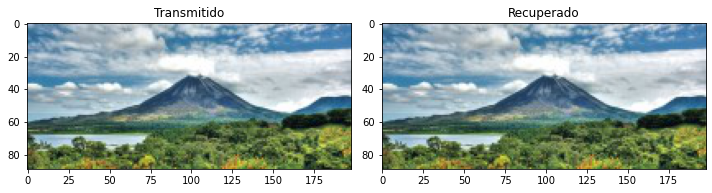

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parámetros
fc = 5000  # frecuencia de la portadora
mpp = 20   # muestras por periodo de la portadora
SNR = 5    # relación señal-a-ruido del canal

# Iniciar medición del tiempo de simulación
inicio = time.time()

# 1. Importar y convertir la imagen a trasmitir
imagen_Tx = fuente_info('arenal.jpg')
dimensiones = imagen_Tx.shape

# 2. Codificar los pixeles de la imagen
bits_Tx = rgb_a_bit(imagen_Tx)

# 3. Modular la cadena de bits usando el esquema QPSK
bits_Tx_nuevos = np.reshape(bits_Tx, (len(bits_Tx)//2, 2))

senal_Tx_I, Pm_I, portadora_I = modulador_I(bits_Tx_nuevos[:, 0], fc, mpp)
senal_Tx_Q, Pm_Q, portadora_Q = modulador_Q(bits_Tx_nuevos[:, 1], fc, mpp)

senal_Tx = senal_Tx_I + senal_Tx_Q
Pm = Pm_I + Pm_Q

# 4. Se transmite la señal modulada, por un canal ruidoso
senal_Rx = canal_ruidoso(senal_Tx, Pm, SNR)

# 5. Se desmodula la señal recibida del canal
bits_Rx, senal_demodulada_I, senal_demodulada_Q = demodulador(senal_Rx, portadora_I, portadora_Q, mpp)

# 6. Se visualiza la imagen recibida 
imagen_Rx = bits_a_rgb(bits_Rx, dimensiones)
Fig = plt.figure(figsize=(10,6))

# Cálculo del tiempo de simulación
print('Duración de la simulación: ', time.time() - inicio)

# 7. Calcular número de errores
errores = sum(abs(bits_Tx - bits_Rx))
BER = errores/len(bits_Tx)
print('{} errores, para un BER de {:0.4f}.'.format(errores, BER))

# Mostrar imagen transmitida
ax = Fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(imagen_Tx)
ax.set_title('Transmitido')

# Mostrar imagen recuperada
ax = Fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(imagen_Rx)
ax.set_title('Recuperado')
Fig.tight_layout()

plt.imshow(imagen_Rx)


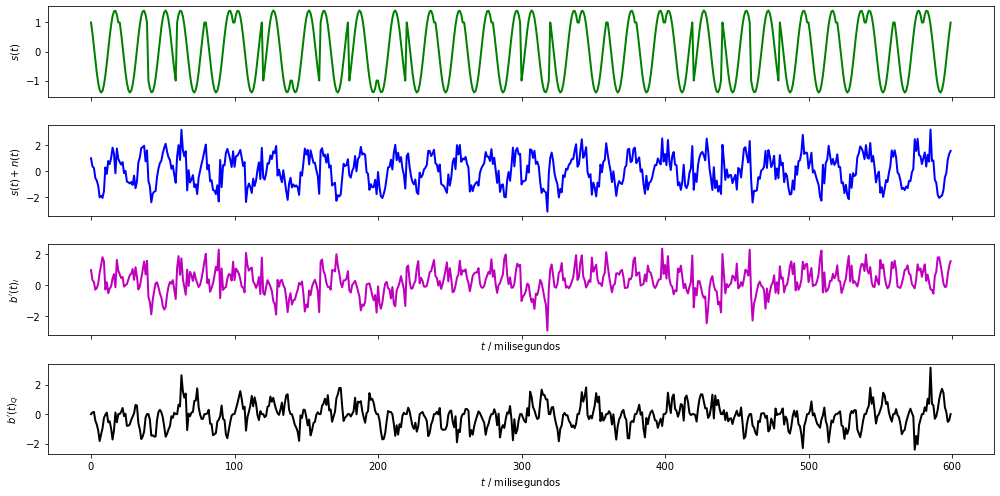

In [19]:
import matplotlib.pyplot as plt

# Visualizar el cambio entre las señales
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(14, 7))

# La señal modulada por QPSK
ax1.plot(senal_Tx[0:600], color='g', lw=2) 
ax1.set_ylabel('$s(t)$')

# La señal modulada al dejar el canal
ax2.plot(senal_Rx[0:600], color='b', lw=2) 
ax2.set_ylabel('$s(t) + n(t)$')

# La señal demodulada_I
ax3.plot(senal_demodulada_I[0:600], color='m', lw=2) 
ax3.set_ylabel('$b^{\prime}(t)_I$')
ax3.set_xlabel('$t$ / milisegundos')
fig.tight_layout()

# La señal demodulada_Q
ax4.plot(senal_demodulada_Q[0:600], color='black', lw=2) 
ax4.set_ylabel('$b^{\prime}(t)_Q$')
ax4.set_xlabel('$t$ / milisegundos')
fig.tight_layout()
plt.show()

### 4.2. - Estacionaridad y ergodicidad

* (30%) Realice pruebas de estacionaridad y ergodicidad a la señal modulada `senal_Tx` y obtenga conclusiones sobre estas.

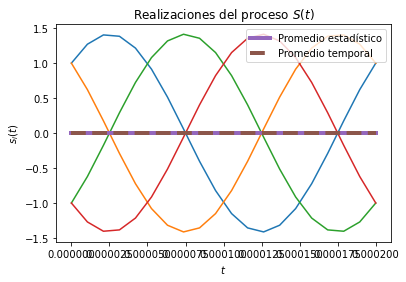

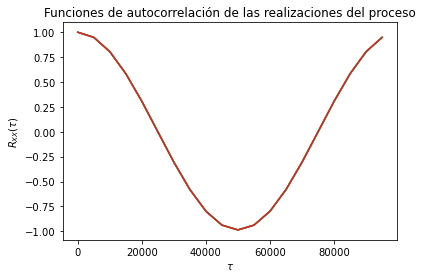

In [20]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Creación del vector de tiempo
# Parámetros
fc = 5000  # frecuencia de la portadora
mpp = 20   # muestras por periodo de la portadoral

Tc = 1 / fc  # periodo [s]
t_periodo = np.linspace(0, Tc, mpp)

# Inicialización del proceso S(t) con N realizaciones
N = 4
S_t = np.empty((N, len(t_periodo)))	# N funciones del tiempo s(t) con T puntos
 
# Creación de las muestras del proceso s(t)
for i in range(N):
    if i==0:
        A1, A2 = 1, 1

    if i==1:
        A1, A2 = 1, -1  

    if i==2:
        A1, A2 = -1, 1
        
    if i==3:
        A1, A2 = -1, -1

    s_t = A1*np.cos(2*np.pi*fc*t_periodo) + A2*np.sin(2*np.pi*fc*t_periodo)
    S_t[i,:] = s_t
    plt.plot(t_periodo, s_t)

# Promedio de las N realizaciones en cada instante (cada punto en t) (promedio estadístico)
P = [np.mean(S_t[:,i]) for i in range(len(t_periodo))]
plt.plot(t_periodo, P, lw=4, label='Promedio estadístico')

# Graficar el resultado del promedio temporal
E = np.mean(senal_Tx)
Lista = []

for i in range(len(t_periodo)):
    Lista.append(np.mean(senal_Tx))

plt.plot(t_periodo, Lista, '--', lw=4, label='Promedio temporal')

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso $S(t)$')
plt.xlabel('$t$')
plt.ylabel('$s_i(t)$')
plt.legend()
plt.show()

# T valores de desplazamiento tau
desplazamiento = np.arange(mpp)
taus = desplazamiento/Tc

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(S_t[n,:], np.roll(S_t[n,:], tau))/mpp
	plt.plot(taus, corr[n,:])

# Gráficas de correlación para cada realización
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.show()

# Se dice que los procesos para los que los promedios temporales igualan a los estadísticos se denominan ergódicos.
# Esto es lo que se cumple en este caso, donde se observa que el promedio temporal es practicamente igual que el
# promedio estadístico.

# El proceso es estacionario en sentido amplio ya que el valor esperado es constante en el tiempo y la autocorrelación
# solo depende de la diferencia temporal tau.

### 4.3. - Densidad espectral de potencia

* (20%) Determine y grafique la densidad espectral de potencia para la señal modulada `senal_Tx`.

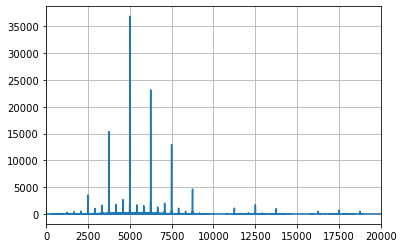

In [21]:
# Asumiendo que es estacionario en sentido amplio
import matplotlib.pyplot as plt
from scipy import fft

# Transformada de Fourier
senal_f = fft.fft(senal_Tx)

# Muestras de la señal
Nm = len(senal_Tx) # Numero de muestras

# Número de símbolos (198 x 89 x 8 x 3)
Ns = Nm // mpp

# Tiempo del símbolo = periodo de la onda portadora
Tc = 1 / fc

# Tiempo entre muestras (periodo de muestreo)
Tm = Tc / mpp # Tiempo de muestras

# Tiempo de la simulación
T = Ns * Tc

# Espacio de frecuencias
f = np.linspace(0.0, 1.0/(2.0*Tm), Nm//2)

# Gráfica
plt.plot(f, 2.0/Nm * np.power(np.abs(senal_f[0:Nm//2]), 2))
plt.xlim(0, 20000)
plt.grid()
plt.show()

---

### Universidad de Costa Rica
#### Facultad de Ingeniería
##### Escuela de Ingeniería Eléctrica

---